# RFI IDENTIFICATION USING GMRT RADIO TELESCOPE

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
B3_C11 = np.loadtxt('C11_1024_Packets_B3.out')
B3_C12 = np.loadtxt('C12_1024_Packets_B3.out')
B5_C11 = np.loadtxt('C11_1024_Packets_B5.out')
B5_C12 = np.loadtxt('C12_1024_Packets_B5.out')

In [3]:
# Setting Constants
delta_t = 2.5e-9
delta_f = 4e+8

time_samples = np.arange(0, len(B3_C11)) * delta_t

### 1. Plots of Voltage vs Time

#### 1.1 Voltage vs Time for Band 3, Antennae C11

Text(0, 0.5, 'Amplitude')

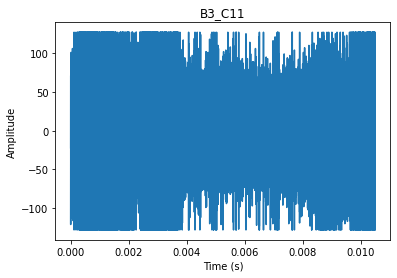

In [4]:
plt.plot(time_samples, B3_C11)
plt.title('B3_C11')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#### 1.2 Voltage vs Time for Band 3, Antennae C12

Text(0, 0.5, 'Amplitude')

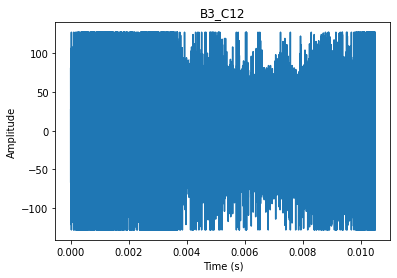

In [5]:
plt.plot(time_samples, B3_C12)
plt.title('B3_C12')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#### 1.3 Voltage vs Time for Band 5, Antennae C11

Text(0, 0.5, 'Amplitude')

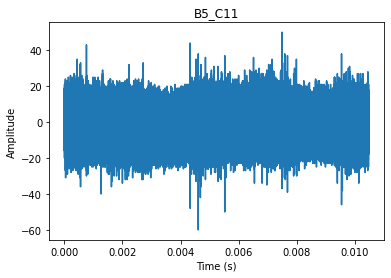

In [6]:
plt.plot(time_samples, B5_C11)
plt.title('B5_C11')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#### 1.4 Voltage vs Time for Band 5, Antennae C12

Text(0, 0.5, 'Amplitude')

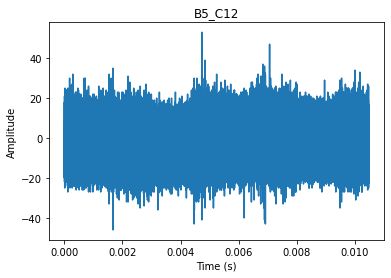

In [7]:
plt.plot(time_samples, B5_C12)
plt.title('B5_C12')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

### 2. Fitting a Gaussian to the data

In [8]:
def fit_normal_distribution(data, name):
    mean, std = norm.fit(data)
    print(f'{name}: mean = {mean}, std = {std}')
    x_values = np.linspace(min(data), max(data), 100)
    data_pdf = (1/np.sqrt(2*np.pi*std**2)) * np.exp(-(x_values-mean)**2/(2*std**2))
    plt.xlabel('Amplitude')
    plt.ylabel('Probability')
    plt.hist(data, bins=100, density=True, alpha=0.5)
    plt.plot(x_values, data_pdf, 'r', label= name + '_pdf')
    plt.show()
    dc_offset_removed = data - mean
    return mean, std, dc_offset_removed

#### 2.1 Gaussian Fit for Band 3, Antennae C11

B3_C11: mean = -1.0569393634796143, std = 21.385557014213084


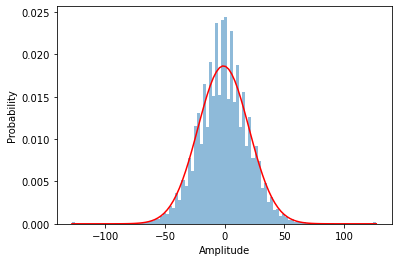

In [9]:
B3C11_mean, B3C11_std, B3_C11_dc_removed = fit_normal_distribution(B3_C11, 'B3_C11')

#### 2.2 Gaussian Fit for Band 3, Antennae C12

B3_C12: mean = -1.058096170425415, std = 21.462586466437152


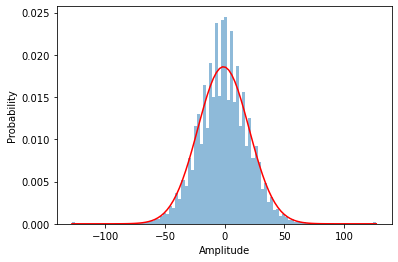

In [10]:
B3C12_mean, B3C12_std, B3_C12_dc_removed  = fit_normal_distribution(B3_C12, 'B3_C12')

#### 2.3 Gaussian Fit for Band 5, Antennae C11

B5_C11: mean = -1.3008010387420654, std = 5.265730068815026


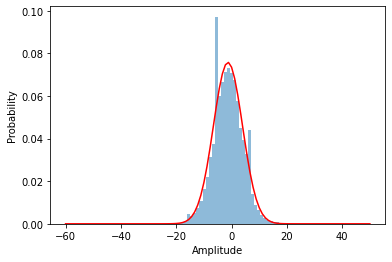

In [11]:
B5C11_mean, B5C11_std, B5_C11_dc_removed  = fit_normal_distribution(B5_C11, 'B5_C11')

#### 2.4 Gaussian Fit for Band 5, Antennae C12

B5_C12: mean = -1.3019917011260986, std = 5.259691845641863


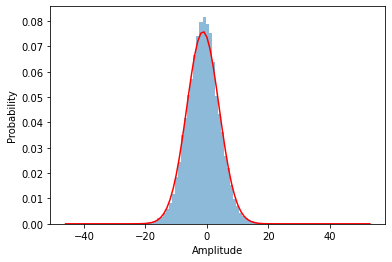

In [12]:
B5C12_mean, B5C12_std, B5_C12_dc_removed  = fit_normal_distribution(B5_C12, 'B5_C12')

### 3. Properties of Power

In [13]:
def power_fit_normal_distribution(data, name):
    mean, std = norm.fit(data)
    print(f'{name}: mean = {mean}, std = {std}')
    x_values = np.linspace(min(data), max(data), 100)
    data_pdf = (1/np.sqrt(2*np.pi*std**2)) * np.exp(-(x_values-mean)**2/(2*std**2))
    plt.xlabel('Amplitude')
    plt.ylabel('Probability')
    plt.hist(data, bins=100, density=True, alpha=0.5)
    plt.plot(x_values, data_pdf, 'r', label= name + '_pdf')
    plt.show()

def plot_power_vs_time(data, name):
    plt.plot(time_samples, data)
    plt.title(name)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

#### 3.1 Gaussian Fit for Power at Band 3, Antennae C11

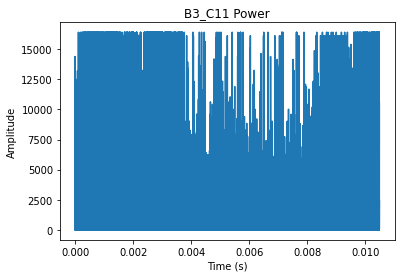

B3_C11 Power: mean = 457.34204880815844, std = 940.0560541920667


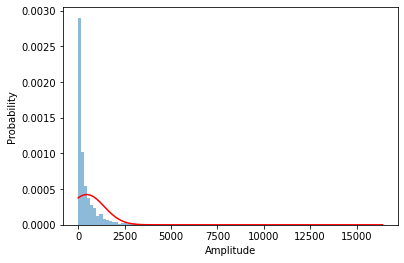

In [14]:
plot_power_vs_time(B3_C11_dc_removed**2, 'B3_C11 Power')
power_fit_normal_distribution(B3_C11_dc_removed**2, 'B3_C11 Power')

#### 3.2 Gaussian Fit for Power at Band 3, Antennae C12

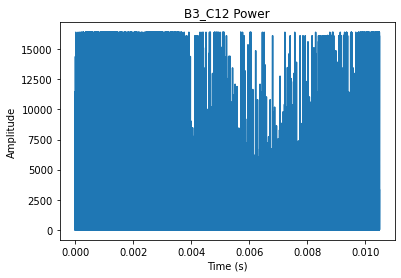

B3_C12 Power: mean = 460.64261782929117, std = 950.7699618623751


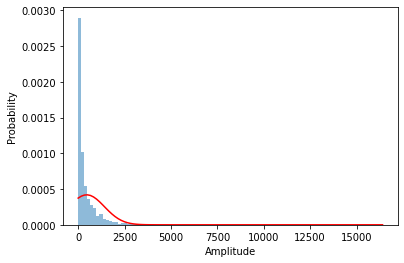

In [15]:
plot_power_vs_time(B3_C12_dc_removed**2, 'B3_C12 Power')
power_fit_normal_distribution(B3_C12_dc_removed**2, 'B3_C12 Power')

#### 3.3 Gaussian Fit for Power at Band 5, Antennae C11

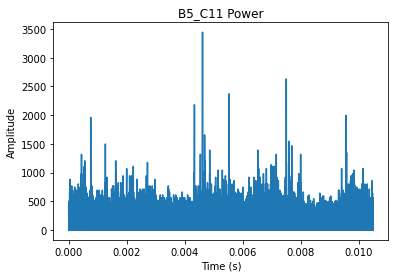

B5_C11 Power: mean = 27.7279131576227, std = 43.70293044221829


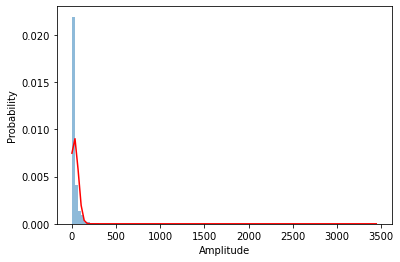

In [16]:
plot_power_vs_time(B5_C11_dc_removed**2, 'B5_C11 Power')
power_fit_normal_distribution(B5_C11_dc_removed**2, 'B5_C11 Power')

#### 3.4 Gaussian Fit for Power at Band 5, Antennae C12

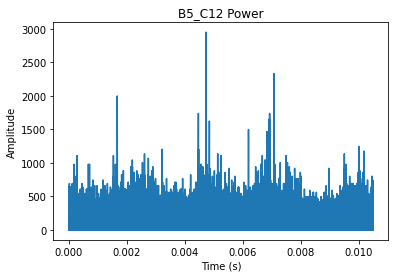

B5_C12 Power: mean = 27.664358311111513, std = 43.57146254736617


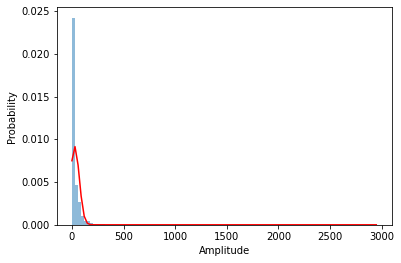

In [17]:
plot_power_vs_time(B5_C12_dc_removed**2, 'B5_C12 Power')
power_fit_normal_distribution(B5_C12_dc_removed**2, 'B5_C12 Power')

### 4. Obtaining the Power Spectrum

In [18]:
def figure_out_power_spectrum(data):
    fft_data = np.fft.fft(data)
    fft_conjugate = np.conj(fft_data)
    power_spectrum = fft_data * fft_conjugate
    return power_spectrum[0:2048]   

def mean_power_spectrum(data):
    s = figure_out_power_spectrum(data[0:4096])
    for i in range(1, 1024):
        s += figure_out_power_spectrum(data[i*4096:(i+1)*4096])
    return s/1024

def plot_mean_power_spectrum(data, text):
    plt.plot(mean_power_spectrum(data)[1:])
    plt.xlabel('Channel')
    plt.ylabel('Magnitude')
    plt.title(text)
    
def plot_dynamic_spectrum(data, text):
    z_list = [figure_out_power_spectrum(data[i*4096:(i+1)*4096]) for i in range(1024)]
    z_grid_values = np.abs(np.transpose(np.array(z_list)))
    plt.title(text)
    plt.xlabel('Time')
    plt.ylabel('Channel')
    a = plt.imshow(z_grid_values, cmap = 'viridis')
    plt.colorbar(a, location='right')
    if text.startswith('B3'):
        plt.clim(0,5e+6)
    if text.startswith('B5'):
        plt.clim(0,2.5e+5)
    
    

    

#### 4.1 Mean Power Spectrums for 4 cases

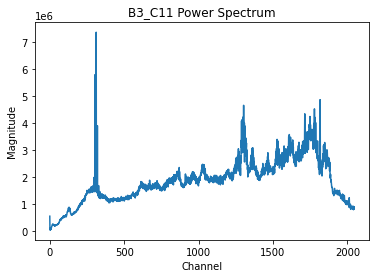

In [19]:
plot_mean_power_spectrum(B3_C11_dc_removed, 'B3_C11 Power Spectrum')

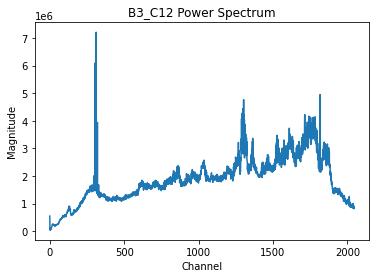

In [20]:
plot_mean_power_spectrum(B3_C12_dc_removed, 'B3_C12 Power Spectrum')

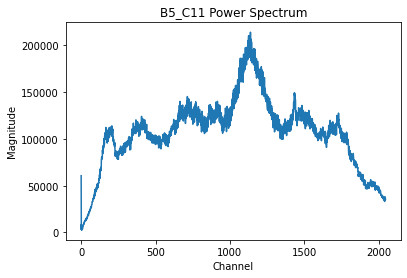

In [21]:
plot_mean_power_spectrum(B5_C11_dc_removed, 'B5_C11 Power Spectrum')

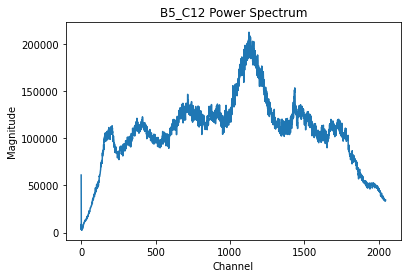

In [22]:
plot_mean_power_spectrum(B5_C12_dc_removed, 'B5_C12 Power Spectrum')

#### 4.2 Dynamic Power Spectrums for 4 cases

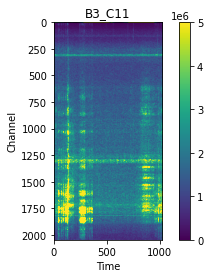

In [23]:
plot_dynamic_spectrum(B3_C11_dc_removed, 'B3_C11')

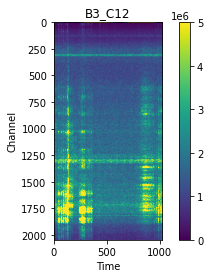

In [24]:
plot_dynamic_spectrum(B3_C12_dc_removed, 'B3_C12')

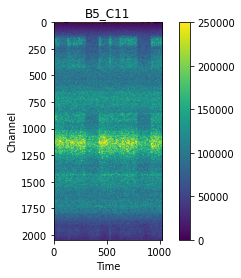

In [25]:
plot_dynamic_spectrum(B5_C11_dc_removed, 'B5_C11')

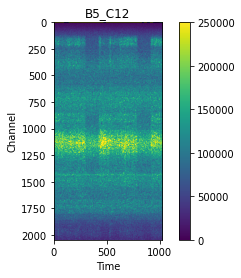

In [26]:
plot_dynamic_spectrum(B5_C12_dc_removed, 'B5_C12')

### 5. Finding the RFI

In [33]:
def mean_to_rms_ratio_power_spectrum(data):
    s = figure_out_power_spectrum(data[0:4096])
    sq = s**2
    for i in range(1, 1024):
        spec = figure_out_power_spectrum(data[i*4096:(i+1)*4096])
        s += spec
        sq += spec**2
    
    mean_power_spectrum = s/1024
    rms_power_spectrum = np.sqrt(sq/1024)
    return mean_power_spectrum/rms_power_spectrum

def plot_mean_to_rms_ratio_spectrum(data, text):
    plt.plot(mean_to_rms_ratio_power_spectrum(data)[1:])
    plt.xlabel('Channel')
    plt.ylabel('mean/rms')
    plt.title(text)

def find_rfi_channels(mean_to_rms_spectrum, mean_power_spectrum):
    rslt = []
    for i in range(len(mean_to_rms_spectrum)):
        mean_near_points = np.mean(mean_to_rms_spectrum[i-5:i+5])
        if np.abs(mean_to_rms_spectrum[i] - mean_near_points) > 0.1:
            power = mean_power_spectrum[i]
            print(f'Channel {i} is RFI, with power of {np.abs(power)}')
            rslt.append((i, power))
    
    return rslt        

#### 5.1 Mean/RMS Spectrums for 4 cases

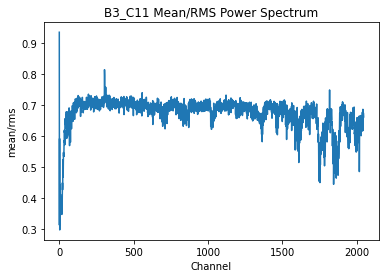

In [34]:
plot_mean_to_rms_ratio_spectrum(B3_C11_dc_removed, 'B3_C11 Mean/RMS Power Spectrum')

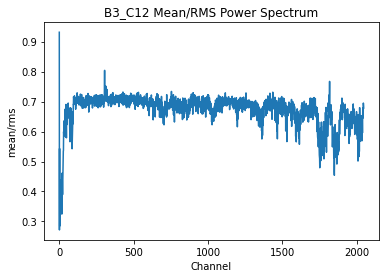

In [35]:
plot_mean_to_rms_ratio_spectrum(B3_C12_dc_removed, 'B3_C12 Mean/RMS Power Spectrum')

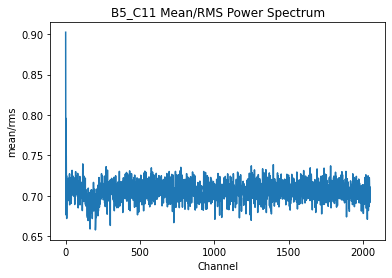

In [36]:
plot_mean_to_rms_ratio_spectrum(B5_C11_dc_removed, 'B5_C11 Mean/RMS Power Spectrum')

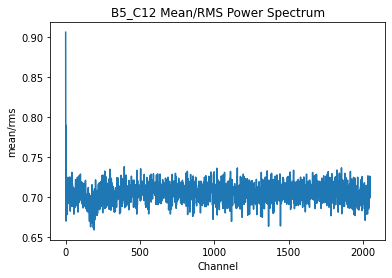

In [37]:
plot_mean_to_rms_ratio_spectrum(B5_C12_dc_removed, 'B5_C12 Mean/RMS Power Spectrum')

#### 5.2 Finding the RFI channels for 4 cases

In [ ]:
# RFIs for B3_C11
RFIs_B3C11 = find_rfi_channels(mean_to_rms_ratio_power_spectrum(B3_C11_dc_removed), mean_power_spectrum(B3_C11_dc_removed))

: 

In [39]:
# RFIs for B3_C12
RFIs_B3C12 = find_rfi_channels(mean_to_rms_ratio_power_spectrum(B3_C12_dc_removed), 
                               mean_power_spectrum(B3_C12_dc_removed))

Channel 2009 is RFI, with power of 1084137.0803059288


In [41]:
# RFIs for B5_C11
RFIs_B5C11 = find_rfi_channels(mean_to_rms_ratio_power_spectrum(B5_C11_dc_removed), 
                               mean_power_spectrum(B5_C11_dc_removed))

In [42]:
# RFIs for B5_C12
RFIs_B5C11 = find_rfi_channels(mean_to_rms_ratio_power_spectrum(B5_C12_dc_removed), 
                               mean_power_spectrum(B5_C12_dc_removed))